/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Accuracy: 77.78%


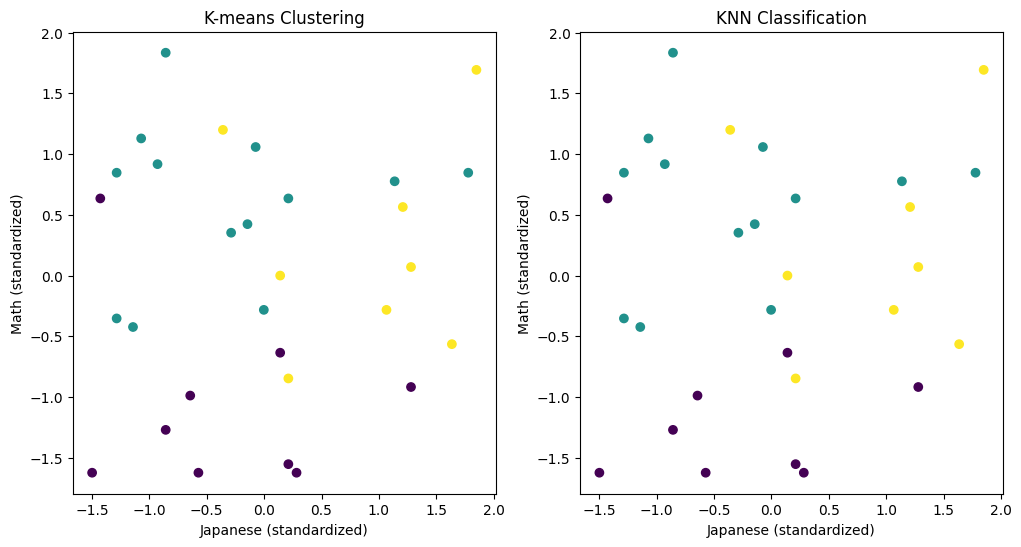

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 学生データ30人分の作成
np.random.seed(0)
student_ids = range(1, 31)
japanese_scores = np.random.randint(50, 100, 30)
math_scores = np.random.randint(50, 100, 30)
english_scores = np.random.randint(50, 100, 30)
science_scores = np.random.randint(50, 100, 30)
social_studies_scores = np.random.randint(50, 100, 30)

data = {
    'StudentID': student_ids,
    'Japanese': japanese_scores,
    'Math': math_scores,
    'English': english_scores,
    'Science': science_scores,
    'SocialStudies': social_studies_scores
}

# DataFrameの作成
df = pd.DataFrame(data)

# 学生IDを除いたデータを抽出
X = df.drop('StudentID', axis=1)

# データの標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means クラスタリング
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# クラスタをデータフレームに追加
df['Cluster'] = clusters

# KNN 用にクラスタラベルを作成
labels = clusters  # K-means のクラスタリング結果をラベルとして使用

# トレーニングデータとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.3, random_state=42)

# KNNのモデル作成
k = 3  # 近傍点の数を指定
knn = KNeighborsClassifier(n_neighbors=k)

# モデルのトレーニング
knn.fit(X_train, y_train)

# テストデータで予測
y_pred = knn.predict(X_test)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# クラスタリング結果の可視化
plt.figure(figsize=(12, 6))

# K-means クラスタリングの可視化
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Japanese (standardized)')
plt.ylabel('Math (standardized)')
plt.title('K-means Clustering')

# KNN 分類結果の可視化
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.xlabel('Japanese (standardized)')
plt.ylabel('Math (standardized)')
plt.title('KNN Classification')

plt.show()


Iteration 1
   StudentID  Japanese  Math  English  Science  SocialStudies  Cluster
0          1        94    65       65       64             59        0
1          2        97    97       54       65             50        0
2          3        50    50       91       70             60        1
3          4        53    68       92       85             93        1
4          5        53    85       81       73             73        0


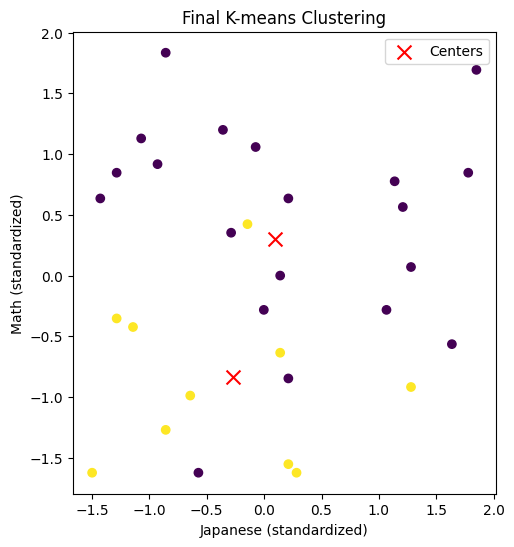

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min

# 学生データ30人分の作成
np.random.seed(0)
student_ids = range(1, 31)
japanese_scores = np.random.randint(50, 100, 30)
math_scores = np.random.randint(50, 100, 30)
english_scores = np.random.randint(50, 100, 30)
science_scores = np.random.randint(50, 100, 30)
social_studies_scores = np.random.randint(50, 100, 30)

data = {
    'StudentID': student_ids,
    'Japanese': japanese_scores,
    'Math': math_scores,
    'English': english_scores,
    'Science': science_scores,
    'SocialStudies': social_studies_scores
}

# DataFrameの作成
df = pd.DataFrame(data)

# 学生IDを除いたデータを抽出
X = df.drop('StudentID', axis=1)

# データの標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 初期クラスタ数
k = 2  # クラスタ数を指定
max_iterations = 1  # 繰り返し回数を指定

# K-means クラスタリング
kmeans = KMeans(n_clusters=k, random_state=0, init='k-means++', n_init=1, max_iter=1)

# 繰り返し処理
for i in range(max_iterations):
    # クラスタリングの実行
    kmeans.fit(X_scaled)
    cluster_centers = kmeans.cluster_centers_
    clusters = kmeans.predict(X_scaled)

    # 各サンプルが最も近いクラスタ中心に再割り当て
    closest_cluster_indices, _ = pairwise_distances_argmin_min(X_scaled, cluster_centers)
    new_clusters = closest_cluster_indices

    # 結果をデータフレームに追加
    df['Cluster'] = new_clusters

    # 結果の表示
    print(f"Iteration {i+1}")
    print(df.head())

# 最終結果の可視化
plt.figure(figsize=(12, 6))

# 最終クラスタリング結果の可視化
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis', marker='o')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100, label='Centers')
plt.xlabel('Japanese (standardized)')
plt.ylabel('Math (standardized)')
plt.title('Final K-means Clustering')
plt.legend()

plt.show()


    StudentID  Japanese  Math  English  Science  SocialStudies  Cluster
0           1        94    65       65       64             59        0
1           2        97    97       54       65             50        0
2           3        50    50       91       70             60        2
3           4        53    68       92       85             93        1
4           5        53    85       81       73             73        1
5           6        89    74       51       65             52        0
6           7        59    99       51       63             84        1
7           8        69    79       89       71             85        1
8           9        71    69       91       98             80        1
9          10        86    69       85       99             53        2
10         11        73    64       88       55             68        0
11         12        56    89       61       91             96        1
12         13        74    82       96       85             85  

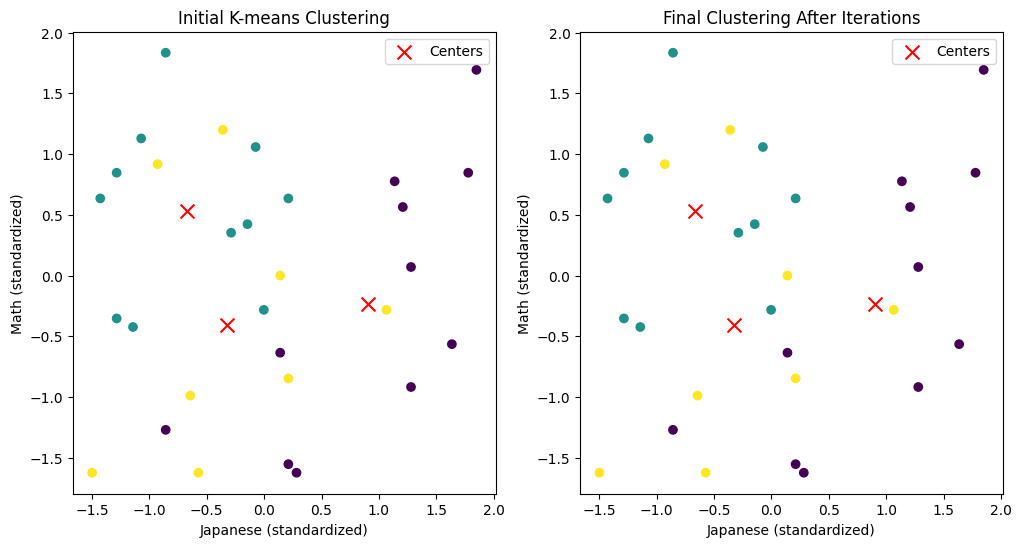

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min

# 学生データ30人分の作成
np.random.seed(0)
student_ids = range(1, 31)
japanese_scores = np.random.randint(50, 100, 30)
math_scores = np.random.randint(50, 100, 30)
english_scores = np.random.randint(50, 100, 30)
science_scores = np.random.randint(50, 100, 30)
social_studies_scores = np.random.randint(50, 100, 30)

data = {
    'StudentID': student_ids,
    'Japanese': japanese_scores,
    'Math': math_scores,
    'English': english_scores,
    'Science': science_scores,
    'SocialStudies': social_studies_scores
}

# DataFrameの作成
df = pd.DataFrame(data)

# 学生IDを除いたデータを抽出
X = df.drop('StudentID', axis=1)

# データの標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means クラスタリングの初期設定
k = 3  # クラスタ数を指定
max_iter = 1000  # 繰り返し回数

# 初期のK-meansクラスタリング
kmeans = KMeans(n_clusters=k, init='random', n_init=1, random_state=0)
clusters = kmeans.fit_predict(X_scaled)
cluster_centers = kmeans.cluster_centers_

# 繰り返し処理
for i in range(max_iter):
    # 各サンプルが最も近いクラスタ中心に再割り当て
    closest_cluster_indices, _ = pairwise_distances_argmin_min(X_scaled, cluster_centers)

    # 新しいクラスタ中心を計算
    kmeans = KMeans(n_clusters=k, init=cluster_centers, n_init=1, max_iter=1000, random_state=0)
    kmeans.fit(X_scaled)
    cluster_centers = kmeans.cluster_centers_

# 最終的なクラスタリング結果
final_clusters = kmeans.predict(X_scaled)

# データフレームに最終クラスタを追加
df['Cluster'] = final_clusters

# 結果を表示
print(df)

# クラスタリング結果の可視化
plt.figure(figsize=(12, 6))

# 初期K-meansクラスタリングの可視化
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', marker='o')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100, label='Centers')
plt.xlabel('Japanese (standardized)')
plt.ylabel('Math (standardized)')
plt.title('Initial K-means Clustering')
plt.legend()

# 最終クラスタリングの可視化
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=final_clusters, cmap='viridis', marker='o')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100, label='Centers')
plt.xlabel('Japanese (standardized)')
plt.ylabel('Math (standardized)')
plt.title('Final Clustering After Iterations')
plt.legend()

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Cluster
0   0.488751   0.873794   0.586629   0.482308   0.317221        0
1   0.680480   0.333437   2.039710   4.245949   0.273541        0
2   1.191197   0.456938   0.521530   2.666095   0.037530        0
3   0.046635   0.010265   1.444263   1.123131   1.773631        0
4   5.838791   1.231379   0.362696   1.134576   0.064960        1


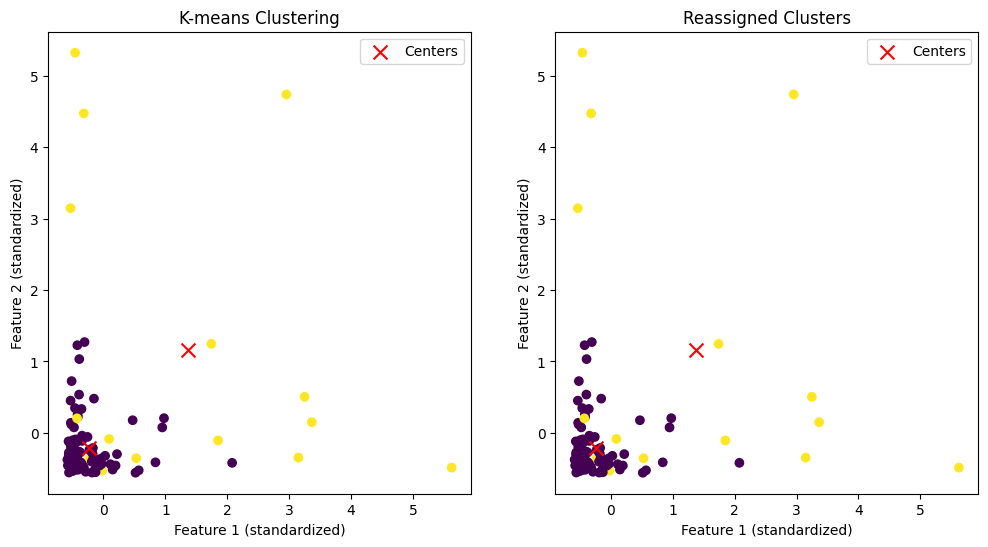

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min

# べき分布に従うデータの生成
np.random.seed(0)
n_samples = 100  # サンプル数
n_features = 5   # 特徴量の数
alpha = 2.0      # べき分布の指数

# べき分布に従うランダムデータの生成
X = np.random.pareto(alpha, (n_samples, n_features))

# データの標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means クラスタリング
k = 2  # クラスタ数を指定
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(X_scaled)
cluster_centers = kmeans.cluster_centers_

# 各サンプルが最も近いクラスタ中心に再割り当て
closest_cluster_indices, _ = pairwise_distances_argmin_min(X_scaled, cluster_centers)
new_clusters = closest_cluster_indices

# データフレームに新しいクラスタを追加
df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(n_features)])
df['Cluster'] = new_clusters

# 結果を表示
print(df.head())

# クラスタリング結果の可視化
plt.figure(figsize=(12, 6))

# K-means クラスタリングの可視化
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', marker='o')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100, label='Centers')
plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.title('K-means Clustering')
plt.legend()

# 再割り当て後の可視化
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=new_clusters, cmap='viridis', marker='o')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100, label='Centers')
plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.title('Reassigned Clusters')
plt.legend()

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Accuracy: 95.56%


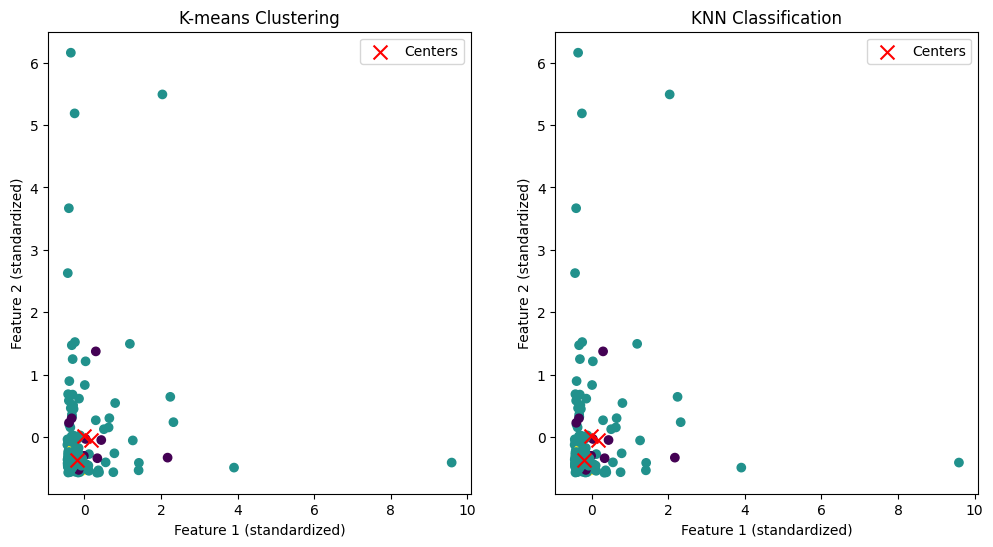

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, pairwise_distances_argmin_min

# べき分布に従うデータの生成
np.random.seed(0)
n_samples = 150  # サンプル数
n_features = 5   # 特徴量の数
alpha = 2.0      # べき分布の指数

# べき分布に従うランダムデータの生成
X = np.random.pareto(alpha, (n_samples, n_features))

# データの標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means クラスタリング
k = 3  # クラスタ数を指定
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(X_scaled)
cluster_centers = kmeans.cluster_centers_

# クラスタリングの結果をラベルとして使用
labels = clusters

# トレーニングデータとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.3, random_state=42)

# KNNのモデル作成
k_nn = 5  # 近傍点の数を指定
knn = KNeighborsClassifier(n_neighbors=k_nn)

# モデルのトレーニング
knn.fit(X_train, y_train)

# テストデータで予測
y_pred = knn.predict(X_test)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# クラスタリング結果の可視化
plt.figure(figsize=(12, 6))

# K-means クラスタリングの可視化
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', marker='o')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100, label='Centers')
plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.title('K-means Clustering')
plt.legend()

# KNN 分類結果の可視化
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100, label='Centers')
plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.title('KNN Classification')
plt.legend()

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   Feature_1  Feature_2  Original Cluster  Reassigned Cluster
0   0.488751   0.873794                 0                   0
1   0.586629   0.482308                 0                   0
2   0.317221   0.680480                 0                   0
3   0.333437   2.039710                 0                   0
4   4.245949   0.273541                 1                   1


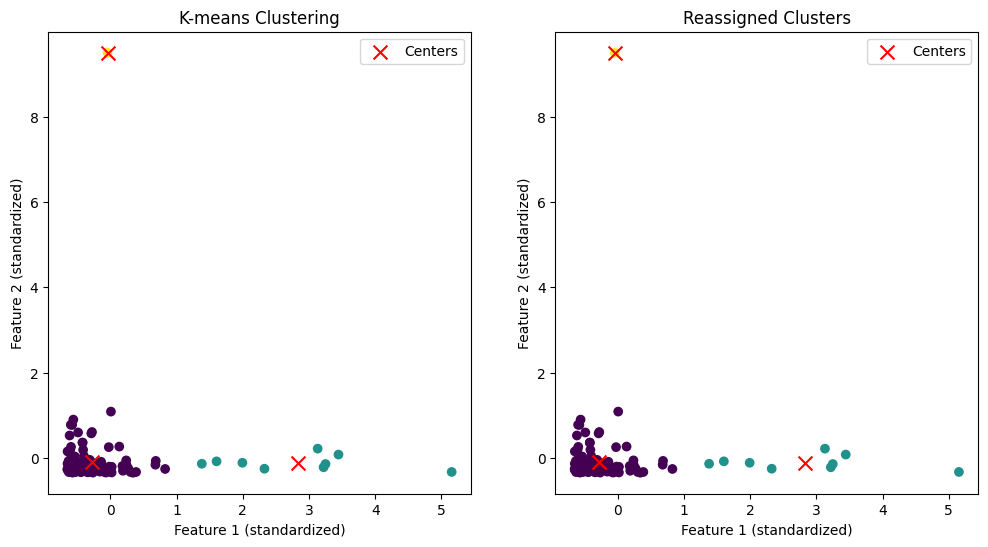

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min

# べき分布に従うデータの生成
np.random.seed(0)
n_samples = 100  # サンプル数
n_features = 2   # 特徴量の数
alpha = 2.0      # べき分布の指数

# べき分布に従うランダムデータの生成
X = np.random.pareto(alpha, (n_samples, n_features))

# データの標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means クラスタリング
k = 3  # クラスタ数を指定
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(X_scaled)
cluster_centers = kmeans.cluster_centers_

# 各サンプルが最も近いクラスタ中心に再割り当て
closest_cluster_indices, _ = pairwise_distances_argmin_min(X_scaled, cluster_centers)
new_clusters = closest_cluster_indices

# データフレームに新しいクラスタを追加
df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(n_features)])
df['Original Cluster'] = clusters
df['Reassigned Cluster'] = new_clusters

# 結果を表示
print(df.head())

# クラスタリング結果の可視化
plt.figure(figsize=(12, 6))

# K-means クラスタリングの可視化
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, marker='o')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100, label='Centers')
plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.title('K-means Clustering')
plt.legend()

# 再割り当て後の可視化
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=new_clusters, marker='o')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100, label='Centers')
plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.title('Reassigned Clusters')
plt.legend()

plt.show()
